In [72]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [61]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [62]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [63]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [116]:
# Fit and transform the data
scaled_market_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_market_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
scaled_market_data_df.head()
print(type(scaled_market_data_df))

<class 'pandas.core.frame.DataFrame'>


### Find the Best Value for k Using the Original Scaled DataFrame.

In [117]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_vals = [item for item in range(1,11)]
# Create an empty list to store the inertia values
inertias = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for val in k_vals:
    k_model = KMeans(n_clusters=val)
    k_model.fit(scaled_market_data_df)
    inertias.append(k_model.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {'k': k_vals, 'inertia': inertias}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)

# Display the DataFrame
print(elbow_df)


    k     inertia
0   1  287.000000
1   2  198.571818
2   3  123.190482
3   4   91.148890
4   5   68.526307
5   6   59.172566
6   7   43.219959
7   8   44.126677
8   9   42.693604
9  10   30.301419


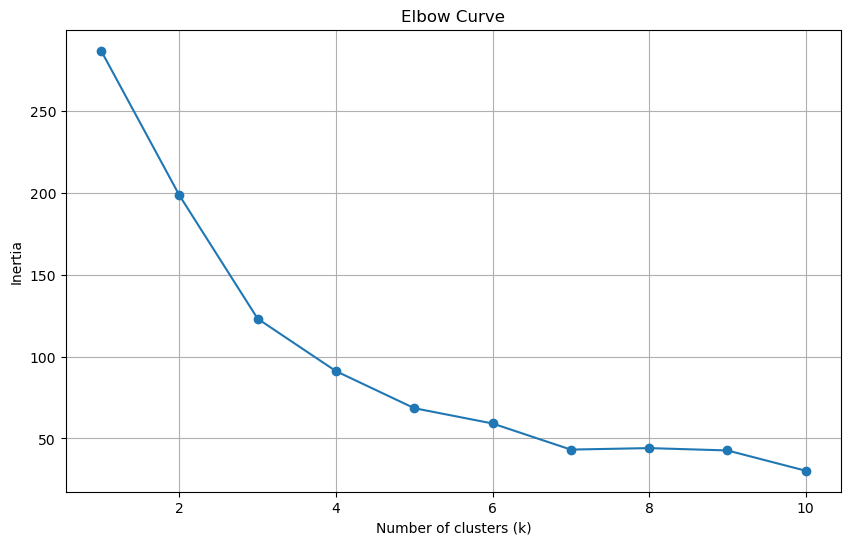

In [118]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [139]:
# Initialize the K-Means model using the best value for k
crypto_k_model = KMeans(n_clusters=4, random_state=1)

In [120]:
# Fit the K-Means model using the scaled data
crypto_k_model.fit(scaled_market_data_df)

KMeans(n_clusters=4)

In [121]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_predictions = crypto_k_model.predict(scaled_market_data_df)
# View the resulting array of cluster values.
print(crypto_predictions)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [122]:
# Create a copy of the DataFrame
scaled_market_data_df_copy = scaled_market_data_df.copy()

In [123]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_df_copy['crypto_clusters'] = crypto_predictions

# Display sample data
scaled_market_data_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: xlabel='Price change percent 24h', ylabel='Price Change percent 7d'>

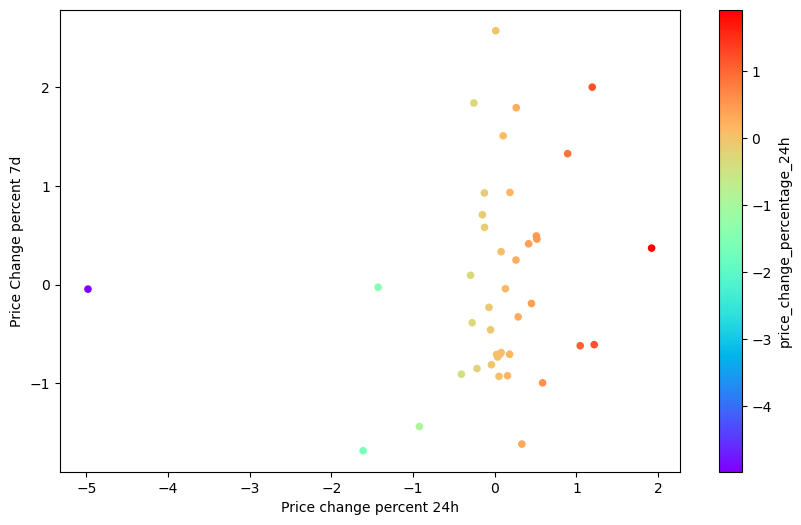

In [124]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_data_df_copy.plot.scatter(x='price_change_percentage_24h', y="price_change_percentage_7d",  c='price_change_percentage_24h',  # Use one of the columns for coloring
    colormap='rainbow',
    colorbar=True,
    figsize=(10, 6),
    xlabel="Price change percent 24h",
    ylabel = 'Price Change percent 7d'
)

### Optimize Clusters with Principal Component Analysis.

In [125]:
# Create a PCA model instance and set `n_components=3`.
crypto_PCA_model = PCA(n_components=3)

In [126]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
PCA_crypto_transformed = crypto_PCA_model.fit_transform(scaled_market_data_df)
PCA_crypto_transformed_df = pd.DataFrame(PCA_crypto_transformed, columns=['PC1', 'PC2', 'PC3'], index=scaled_market_data_df.index)
# View the first five rows of the DataFrame. 
PCA_crypto_transformed_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [127]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = crypto_PCA_model.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)
print('Total explained variance:', explained_variance.sum())

Explained variance ratio: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309842

In [128]:
# Create a new DataFrame with the PCA data.
crypto_PCA_df = PCA_crypto_transformed_df.copy()
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data

# Set the coinid column as index

# Display sample data
crypto_PCA_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [129]:
k_vals_pca = [item for item in range(1,11)]
inertias_pca = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for val in k_vals_pca:
    k_model = KMeans(n_clusters=val)
    k_model.fit(crypto_PCA_df)
    inertias_pca.append(k_model.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_dict_pca = {'k': k_vals, 'inertia': inertias}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_dict)

# Display the DataFrame
print(elbow_pca_df)



    k     inertia
0   1  287.000000
1   2  198.571818
2   3  123.190482
3   4   91.148890
4   5   68.526307
5   6   59.172566
6   7   43.219959
7   8   44.126677
8   9   42.693604
9  10   30.301419


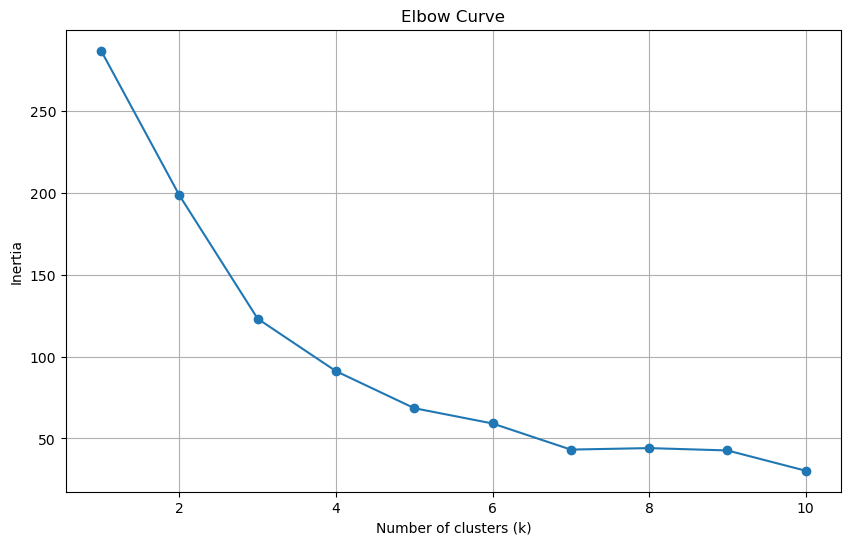

In [130]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_pca_df['k'], elbow_pca_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3 or 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [138]:
# Initialize the K-Means model using the best value for k
crypto_PCA_kmodel = KMeans(n_clusters=4, random_state=1)

In [132]:
# Fit the K-Means model using the PCA data
crypto_PCA_kmodel.fit(crypto_PCA_df)

KMeans(n_clusters=4)

In [133]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_PCA_predictions = crypto_PCA_kmodel.predict(crypto_PCA_df)

# Print the resulting array of cluster values.
print(crypto_PCA_predictions)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [134]:
# Create a copy of the DataFrame with the PCA data
crypto_PCA_df_copy = crypto_PCA_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_PCA_df_copy['crypto_cluster'] = crypto_PCA_predictions

# Display sample data
crypto_PCA_df_copy.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


<Axes: xlabel='PCA1', ylabel='PCA2'>

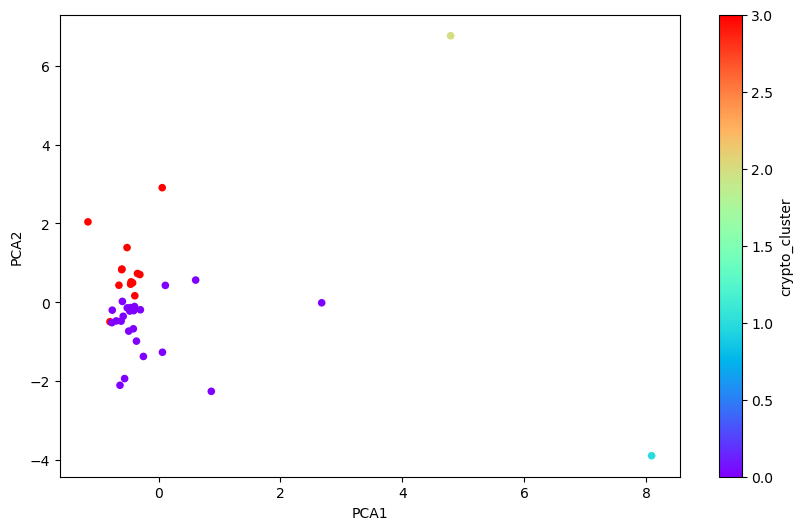

In [140]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_PCA_df_copy.plot.scatter(x='PC1', y="PC2",  c='crypto_cluster',  # Use one of the columns for coloring
    colormap='rainbow',
    colorbar=True,
    figsize=(10, 6),
    xlabel="PCA1",
    ylabel = 'PCA2'
)

### Determine the Weights of Each Feature on each Principal Component

In [148]:
# Use the columns from the original scaled DataFrame as the index.
pca_weights = pd.DataFrame(crypto_PCA_model.components_.T, columns=['PC1','PC2', 'PC3'], index=scaled_market_data_df.columns)
pca_weights.describe()

,PC1,PC2,PC3
count,7.000000,7.000000,7.000000
mean,0.163773,0.285597,0.089366
std,0.367933,0.267408,0.396673
min,-0.416728,-0.150789,-0.361377
25%,-0.055797,0.127583,-0.200269
50%,0.191523,0.358162,0.039733
75%,0.444372,0.487228,0.280037
max,0.594468,0.562182,0.787670


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    